# **Time Series decomposition with Pandas and StatModels**

In [6]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.8.0-py3-none-any.whl size=12587 sha256=fbb8411e26ca541e3a497fb11ceda0345d9098daf1f92325f357080f7a0309b4
  Stored in directory: /root/.cache/pip/wheels/ca/a9/1f/90c7a8a37ac37ff0fa0a27b2152f9b24be8910448ab93992f8
Successfully built empiricaldist


In [12]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

Downloaded thinkstats.py


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

Time Series Analysis on Electricity Data

In [23]:
filename = "Net_generation_for_all_sectors.csv"
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/" + filename) #downloading the dataset from a github repo

Downloaded Net_generation_for_all_sectors.csv


In [24]:
#Initial data transformation
elec = (
    pd.read_csv("Net_generation_for_all_sectors.csv", skiprows=4)
    .drop(columns=["units", "source key"])
    .set_index("description")
    .replace("--", np.nan)
    .transpose()
    .astype(float)
)

In [25]:
#lets view existing columns
elec.columns

Index(['Net generation for all sectors', 'United States',
       'United States : all fuels (utility-scale)', 'United States : nuclear',
       'United States : conventional hydroelectric',
       'United States : other renewables', 'United States : wind',
       'United States : all utility-scale solar', 'United States : geothermal',
       'United States : biomass',
       'United States : hydro-electric pumped storage',
       'United States : all solar',
       'United States : small-scale solar photovoltaic'],
      dtype='object', name='description')

In [27]:
#lets view the dataset
elec.head()

description,Net generation for all sectors,United States,United States : all fuels (utility-scale),United States : nuclear,United States : conventional hydroelectric,United States : other renewables,United States : wind,United States : all utility-scale solar,United States : geothermal,United States : biomass,United States : hydro-electric pumped storage,United States : all solar,United States : small-scale solar photovoltaic
Jan 2001,NaN,NaN,NaN,68707.0,18852.0,NaN,389.0,7.0,1229.0,4400.0,-589.0,NaN,NaN
Feb 2001,NaN,NaN,NaN,61272.0,17473.0,NaN,431.0,13.0,1073.0,3793.0,-707.0,NaN,NaN
Mar 2001,NaN,NaN,NaN,62141.0,20477.0,NaN,532.0,31.0,1190.0,4042.0,-773.0,NaN,NaN
Apr 2001,NaN,NaN,NaN,56003.0,18013.0,NaN,685.0,39.0,1095.0,4008.0,-796.0,NaN,NaN
May 2001,NaN,NaN,NaN,61512.0,19176.0,NaN,635.0,81.0,1071.0,3951.0,-623.0,NaN,NaN


In [28]:
#lets key the rows
elec.index[:12]

Index(['Jan 2001', 'Feb 2001', 'Mar 2001', 'Apr 2001', 'May 2001', 'Jun 2001',
       'Jul 2001', 'Aug 2001', 'Sep 2001', 'Oct 2001', 'Nov 2001', 'Dec 2001'],
      dtype='object')

In [29]:
#lets convert the description to a timestamp
elec.index = pd.date_range(start="2001-01", periods=len(elec), freq="ME")
elec.index[:6]

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
#the freq=ME fills in the last day of each month
#Now the index is a DataTimeIndex with the data type datetime64[ns], which is defined in NumPy -- 64 means each one uses 64 bits, and ns means it has nanosecond precision.

Seasonal Decomposition

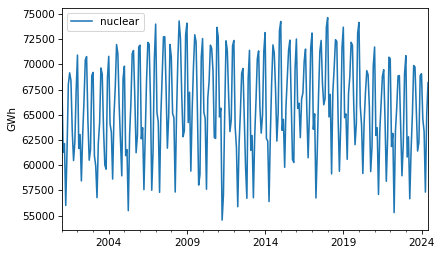

In [30]:
nuclear = elec["United States : nuclear"]
nuclear.plot(label="nuclear")

decorate(ylabel="GWh")

Applying a moving average

In [31]:
trend = nuclear.rolling(window=12).mean()
trend

,United States : nuclear
2001-01-31,NaN
2001-02-28,NaN
2001-03-31,NaN
2001-04-30,NaN
2001-05-31,NaN
...,...
2024-02-29,64777.916667
2024-03-31,64821.750000
2024-04-30,64877.083333
2024-05-31,65168.750000


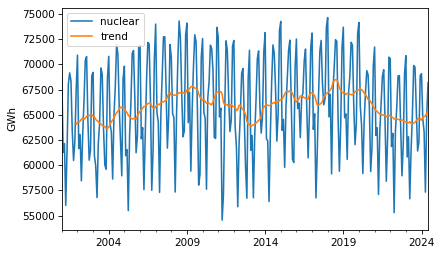

In [32]:
#adding the moving average to the plot
nuclear.plot(label="nuclear")
trend.plot(label="trend")
decorate(ylabel="GWh")

In [33]:
detrended = (nuclear - trend).dropna()

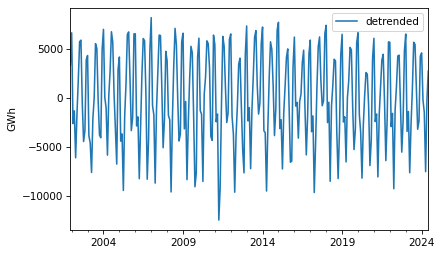

In [34]:
detrended.plot(label="detrended")
decorate(ylabel="GWh")

In [35]:
monthly_averages = detrended.groupby(detrended.index.month).mean() #grouping the data by the month and getting the mean of each month
monthly_averages

,United States : nuclear
1,6254.257246
2,-2338.655797
3,-1953.630435
4,-8195.728261
5,-2043.485507
6,1434.597826
7,5264.647727
8,5196.424242
9,83.522727
10,-4902.681818


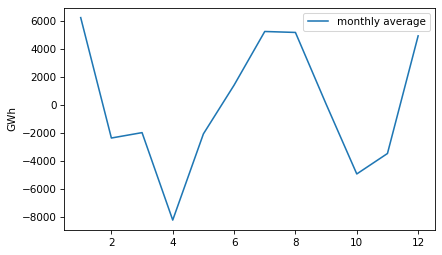

In [36]:
#plotting the monthly averages
monthly_averages.plot(label="monthly average")
decorate(ylabel="GWh")

In [37]:
#lets now create an equivalent data set (to the original) with just the monthly averages for each of the months. this will be our seasonal set
seasonal = monthly_averages[nuclear.index.month]
seasonal.index = nuclear.index
seasonal

,United States : nuclear
2001-01-31,6254.257246
2001-02-28,-2338.655797
2001-03-31,-1953.630435
2001-04-30,-8195.728261
2001-05-31,-2043.485507
...,...
2024-02-29,-2338.655797
2024-03-31,-1953.630435
2024-04-30,-8195.728261
2024-05-31,-2043.485507


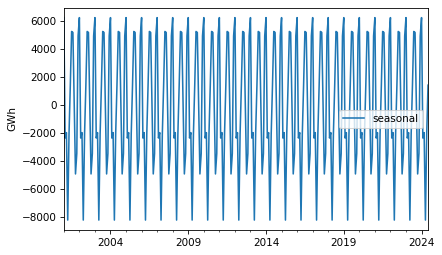

In [ ]:
#plotting the complete seasonal data
seasonal.plot(label='seasonal')
decorate(ylabel="GWh")

In [ ]:
#lets combine the trend plus the seasonal which will be our expected
expected = trend + seasonal
expected

,United States : nuclear
2001-01-31,NaN
2001-02-28,NaN
2001-03-31,NaN
2001-04-30,NaN
2001-05-31,NaN
...,...
2024-02-29,62439.260870
2024-03-31,62868.119565
2024-04-30,56681.355072
2024-05-31,63125.264493


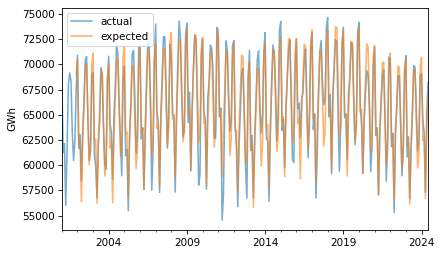

In [ ]:
#ploting expected on the original plot
nuclear.plot(label="actual", alpha=0.6)
expected.plot(color="C1", alpha=0.6, label="expected")
decorate(ylabel="GWh")

In [ ]:
#get the residual
resid = nuclear - expected
resid

,United States : nuclear
2001-01-31,NaN
2001-02-28,NaN
2001-03-31,NaN
2001-04-30,NaN
2001-05-31,NaN
...,...
2024-02-29,2144.739130
2024-03-31,477.880435
2024-04-30,644.644928
2024-05-31,1847.735507


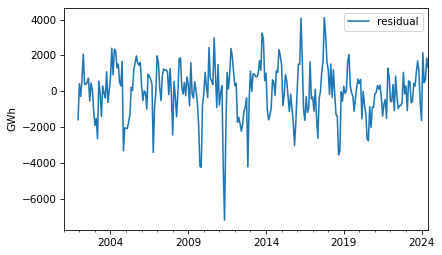

In [ ]:
resid.plot(label="residual")
decorate(ylabel="GWh")

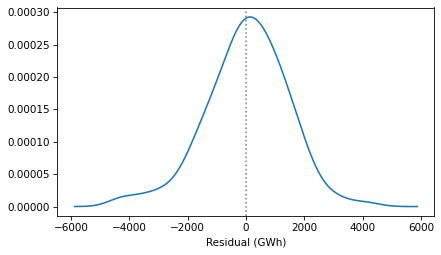

In [ ]:
from thinkstats import plot_kde

plot_kde(resid.dropna())
decorate(xlabel="Residual (GWh)")

In [ ]:
#calculating r squared
rsquared = 1 - resid.var() / nuclear.var()
rsquared

0.9054559977517084

The  R2  value is about 0.92, which means that the long-term trend and seasonal component account for 92% of the variability in the series.

Doing seasonal decomposition with Statmodels

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(nuclear, model="additive", period=12)

In [40]:
#defining the ploting function
def plot_decomposition(original, decomposition):
    plt.figure(figsize=(6, 5))

    ax1 = plt.subplot(4, 1, 1)
    plt.plot(original, label="Original", color="C0")
    plt.ylabel("Original")

    plt.subplot(4, 1, 2, sharex=ax1)
    plt.plot(decomposition.trend, label="Trend", color="C1")
    plt.ylabel("Trend")

    plt.subplot(4, 1, 3, sharex=ax1)
    plt.plot(decomposition.seasonal, label="Seasonal", color="C2")
    plt.ylabel("Seasonal")

    plt.subplot(4, 1, 4, sharex=ax1)
    plt.plot(decomposition.resid, label="Residual", color="C3")
    plt.ylabel("Residual")

    plt.tight_layout()

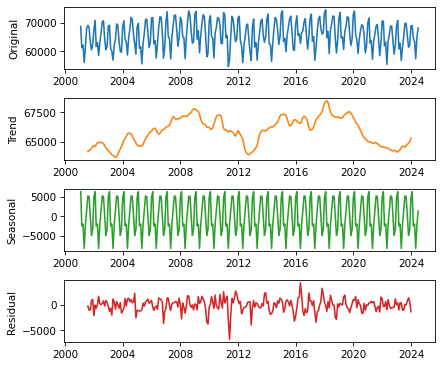

In [ ]:
plot_decomposition(nuclear, decomposition)

Seasonal Temparature model

In [1]:
#defining the data source
import requests

# Define the URL
url = "https://ourworldindata.org/grapher/average-monthly-surface-temperature.metadata.json"
query_params = {
    "v": "1",
    "csvType": "full",
    "useColumnShortNames": "true"
}
headers = {'User-Agent': 'Our World In Data data fetch/1.0'}

# Send the GET request with the query parameters
response = requests.get(url, params=query_params, headers=headers)
metadata = response.json()

In [2]:
#exploring the metadata our the dataset
from pprint import pprint

pprint(metadata['columns']['temperature_2m'])

{'citationLong': 'Contains modified Copernicus Climate Change Service '
                 'information (2025) – with major processing by Our World in '
                 'Data. “Annual average” [dataset]. Contains modified '
                 'Copernicus Climate Change Service information, “ERA5 monthly '
                 'averaged data on single levels from 1940 to present 2” '
                 '[original data].',
 'citationShort': 'Contains modified Copernicus Climate Change Service '
                  'information (2025) – with major processing by Our World in '
                  'Data',
 'descriptionProcessing': '- Temperature measured in kelvin was converted to '
                          'degrees Celsius (°C) by subtracting 273.15.\n'
                          '\n'
                          '- Initially, the temperature dataset is provided '
                          'with specific coordinates in terms of longitude and '
                          'latitude. To tailor this data to ea

In [3]:
#extrcating US data
country_code = 'USA'    # replace this with other three-letter country codes
base_url = "https://ourworldindata.org/grapher/average-monthly-surface-temperature.csv"

query_params = {
    "v": "1",
    "csvType": "filtered",
    "useColumnShortNames": "true",
    "tab": "chart",
    "country": country_code
}

In [14]:
from urllib.parse import urlencode

url = f"{base_url}?{urlencode(query_params)}"
temp_df = pd.read_csv(url, storage_options=headers)

In [15]:
temp_df.head()

,Entity,Code,year,Day,temperature_2m,temperature_2m.1
0,United States,USA,1941,1941-12-15,-1.878019,8.016244
1,United States,USA,1942,1942-01-15,-4.776551,7.848984
2,United States,USA,1942,1942-02-15,-3.870868,7.848984
3,United States,USA,1942,1942-03-15,0.097811,7.848984
4,United States,USA,1942,1942-04-15,7.537291,7.848984


In [17]:
temp_series = temp_df['temperature_2m']
temp_series

,temperature_2m
0,-1.878019
1,-4.776551
2,-3.870868
3,0.097811
4,7.537291
...,...
995,4.312016
996,0.942230
997,-3.059447
998,-0.677757


In [19]:
temp_series.index = pd.to_datetime(temp_df['Day']) #changing the index to day
temp_series

,temperature_2m
Day,
1941-12-15,-1.878019
1942-01-15,-4.776551
1942-02-15,-3.870868
1942-03-15,0.097811
1942-04-15,7.537291
...,...
2024-11-15,4.312016
2024-12-15,0.942230
2025-01-15,-3.059447


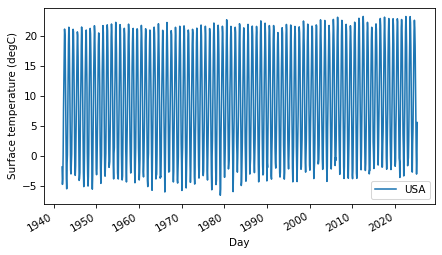

In [20]:
#Plotting the series
temp_series.plot(label=country_code)
decorate(ylabel="Surface temperature (degC)")

Decompising the series

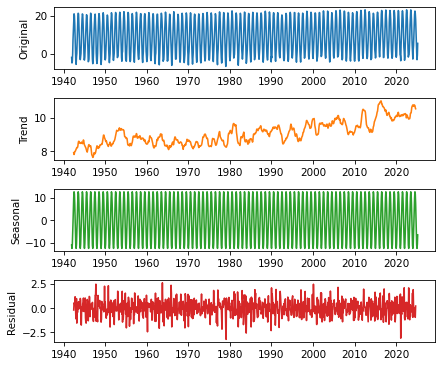

In [41]:
decomposition = seasonal_decompose(temp_series, model="additive", period=12)
plot_decomposition(temp_series, decomposition)

In [42]:
rsquared = 1 - decomposition.resid.var() / temp_series.var()
rsquared

0.9918691985040111